# Validação de Modelos

Em aulas anteriores, aprendemos a receita básica para criar modelos de aprendizado de máquina. Também aprendemos que é possível ter uma noção do desempenho de um modelo usando o que é conhecido como **conjunto de validação**, dada uma métrica apropriada (**recall**, **precision**, **accuracy**, **specificit**). O problema agora é entender como podemos aplicar estas métricas para termos um bom indicativo de que os valores de desempenho que calculamos durante esta fase são realmente próximos do desempenho a ser obtido quando o modelo entrar em produção. Para que isso seja possível, precisamos separar os nossos dados em vários subconjuntos.

## Separação em Treino e Teste

A primeira separação seria em um subconjuntos de treino e teste, o mais importante é internalizar os motivos de fazermos isso.
Imagine que você esteja treinando para correr uma corrida muito importante. Para isso, você precisa de um treinamento adequado para melhorar sua performance.

Agora, imagine que seu treinador decidiu que você só irá treinar em uma pista muito fácil, sem obstáculos ou desafios, todos os dias. Você pode até ficar bom correndo naquela pista, mas será que estará realmente pronto para a corrida importante?

Por isso, é importante separar os dados em treino e teste ao analisar dados. Os dados de treino são como a pista de treino que você usa para melhorar a performance. Já os dados de teste são uma simulação da corrida importante que você precisa estar preparado. É esperado que o seu desempenho na corrida seja mais próximo da pista de teste do que da pista de treino.

Se usarmos todos os dados para treinar nosso modelo, ele pode ficar muito bom em prever coisas que já vimos antes, mas pode não ser tão bom quando enfrentar novos desafios. Ao separar os dados em treino e teste, podemos ter indícios de que nosso modelo é bom em prever coisas que nunca vimos antes, assim como um corredor que treinou em pistas diferentes pode estar mais preparado para enfrentar obstáculos na corrida importante.


Em outras palavras, retemos um subconjunto de dados do treinamento do modelo e, em seguida, usamos esse conjunto para verificar o desempenho do modelo. Essa divisão pode ser feita usando a função  **train_test_split** no Scikit-Learn:

In [ ]:
# Importação das features e do array de target
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Configuração da metodologia de treino e teste
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=2023,
                                  train_size=0.7, stratify = y)
print("Features de Treino", X1.shape)
print("Target de Treino", y1.shape)
print("Features de Teste", X2.shape)
print("Target de Teste", y2.shape)


Features de Treino (105, 4)
Target de Treino (105,)
Features de Teste (45, 4)
Target de Teste (45,)


In [ ]:
# Instanciação de um modelo
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# Ajuste do modelo aos dados de treinamento
model.fit(X1, y1)

# Avaliação do modelo usando dados de teste
from sklearn.metrics import accuracy_score
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9777777777777777

Note que a acurácia esperada, obtida no banco de dados de teste, é inferior à acurácia obtida no banco de dados de treino, um comportamento que está dentro do esperado.

In [ ]:
accuracy_score(y1, model.predict(X1))

1.0

## Separação em Treino, Validação e Teste

Continuando com a nossa metáfora de preparação para uma corrida muito importante. Vamos supor que você tem um ano para se preparar para a corrida e que o seu treinador, a cada 15 dias, lhe leva para a pista de teste para analisar o seu desempenho.

Neste cenário, você depois de um tempo notará que já conhece com perfeição tanto a pista de treino quanto a pista de teste. Todos os obstáculos que antes serviam para medir a sua reação em situações desconhecidas pararam de cumprir o seu propósito, porque você já sabe onde os obstáculos estão. Em outras palavras, **usar com frequência a pista de teste faz com que ela não ofereça mais um bom indicativo do seu desempenho quando estiver na corrida**.

Para impedir que isso aconteça, o treinador deverá mudar a metodologia de treino para o seguinte:

* **Pista de Treino:** local onde os exercícios serão conduzidos diariamente.

* **Pista de Validação:** local onde periodicamente o treino será relizado. Neste momento, o treinador medirá o seu desempenho e poderá fazer ajustes como: troca de sapato, ajuste de equipamentos e outras mudanças.

* **Pista de Teste:** local onde o treino será realizado uma única vez pouco antes da corrida, com o propósito de saber o seu desempenho antes da corrida.

Trazendo a metáfora para o nosso contexto, temos os seguintes subconjuntos de dados:


* **Dados de treinamento:** usado para treinar o modelo.

* **Dados de validação:**  usado para comparação de diferentes modelos e hiperparâmetros.

* **Dados de teste:** usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

Anteriormente, nós já dividimos os dados do conjunto de dados **Iris** em treino e teste. Vamos a seguir analisar como a divisão poderia ser feita em treino, teste e validação. O segredo aqui será usar a função **train_test_split** duas vezes:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=2023)

## Tamanho da validação: # 0.25 x 0.8 = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.75,
                                                      random_state=2023)

In [ ]:
print("Features de Treino", X_train.shape)
print("Target de Treino", y_train.shape)
print("Features de Validação", X_valid.shape)
print("Target de Valicação", y_valid.shape)
print("Features de Teste", X_test.shape)
print("Target de Teste", y_test.shape)

Features de Treino (90, 4)
Target de Treino (90,)
Features de Validação (30, 4)
Target de Valicação (30,)
Features de Teste (30, 4)
Target de Teste (30,)


In [ ]:
# Instanciação de um modelo
model = KNeighborsClassifier(n_neighbors=1)

# Ajuste do modelo aos dados de treinamento
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
tre_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_valid, model.predict(X_valid))
tes_acc = accuracy_score(y_test, model.predict(X_test))

print("Treino", tre_acc)
print("Validação", val_acc)
print("Teste", tes_acc)

Treino 1.0
Validação 0.9333333333333333
Teste 1.0


## Cross-Validation (Validação Cruzada)

Uma desvantagem da simples divisão em dados de treino, dados de validação e em dados de teste é que o modo como a divisão foi feita tem muito impacto nos resultados do modelo. Além disso, perdemos uma parte de nossos dados que poderiam ser usados no treinamento do modelo.

Uma maneira de resolver isso é usar a validação cruzada. Nesse caso, dividimos os dados de treinamento em **folds** e uma sequência de treinamentos é feita com cada **fold** sendo usado como um conjunto de  validação uma vez. Visualmente, pode ser algo como isto:

![alt text](http://www.ic.unicamp.br/~udias/si202/cross_validation.png)

O método de validação cruzada já vem implementado por padrão no Scikit. Por exemplo, a sequência de treino e validação mostrada acima pode ser implementada da seguinte forma:

In [ ]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=2023)
model = KNeighborsClassifier(n_neighbors=1)

cross_val_score(model, X_train, y_train, cv=5) ## Usa o score próprio do classificador

## Outras opções de score seriam:
# cross_val_score(... , scoring="recall_micro")
# cross_val_score(... , scoring="recall_macro")
# cross_val_score(... , scoring="precision_micro")
# cross_val_score(... , cv=5, scoring="precision_macro")

array([0.91666667, 1.        , 0.91666667, 0.95833333, 0.91666667])

In [ ]:
## Esses valores poderiam nos ajudar a escolher melhor os
## classificadores. Por exemplo, comparar com DecisionTree, sem
## que isso necessite usar os dados de teste.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

cross_val_score(model, X_train, y_train, cv=5)

array([0.875     , 1.        , 0.83333333, 0.95833333, 0.83333333])

In [ ]:
## Esses valores poderiam nos ajudar também a escolher melhor os
## hiperparâmetros. Por exemplo, max_depth = 5, sem
## que isso necessite usar os dados de teste.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 15)

## cv o número de folds
cross_val_score(model, X_train, y_train, cv=5)

array([0.875     , 1.        , 0.83333333, 0.91666667, 0.875     ])

Em resumo, repetir a validação em diferentes subconjuntos de dados nos fornece uma ideia ainda melhor do desempenho do algoritmo.

**Ao final, feita a escolha do melhor classificador e dos melhores hiperparâmetros nos permitirá treinar novamente com essas configurações e todo o banco de dados treino, para posteriormente verificar o resultado com o banco de dados de teste**


## Leave One Out

O Scikit-Learn implementa vários esquemas de validação cruzada que são úteis em situações particulares. Por exemplo, podemos recorrer ao caso extremo em que nosso número de **folds** é igual ao número amostras. Em outras palavras, treinamos em todos as instâncias, exceto uma em cada tentativa. Esse tipo de validação cruzada é conhecido como validação cruzada **leave one out** e pode ser usado da seguinte maneira:

In [ ]:
from sklearn.model_selection import LeaveOneOut
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=2023)
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1.])

Como temos 150 amostras, a validação cruzada gera pontuações para 150 tentativas. O resultado indica uma previsão bem-sucedida (1) ou mal sucedida (0). A média é uma estimativa da taxa de erro:

In [ ]:
scores.mean()

0.9333333333333333

Outros esquemas de validação podem ser usados de maneira similar.

# Seleção de Modelos

Conhecendo os conceitos básicos de validação e validação cruzada, podemos agora aprofundar a respeito da seleção de modelos e de hiperparâmetros. Essas questões são aspectos importantes do aprendizado de máquina. A pergunta que nos guiará é: **se o nosso estimador estiver com baixo desempenho, como devemos proceder?**

*   Usar um modelo mais sofisticado?
*   Usar um modelo menos sofisticado?
*   Reunir mais amostras de treinamento?
*   Adicionar features a cada amostra?

Não existe uma resposta única para todos os problemas. Em particular:

* O uso de um modelo mais sofisticados pode gerar resultados piores;

* Adicionar mais amostras de treinamento pode não surtir efeito.

A capacidade de determinar quais etapas melhorarão o modelo requer algum tempo de experiência, mas todas elas passam pela identificação do que pode estar causando o resultado ruim do ponto de vista de viés e variância.

## Viés e Variância (Bias-Variance Tradeoff)

De modo geral, a escolha de um modelo consiste em encontrar um bom compromisso entre viés e variância. Antes de mais nada, vamos tentar compreender os conceitos.

Imagine que você está jogando dardos em um alvo. Se você acertar sempre no mesmo lugar, mas longe do centro do alvo, dizemos que você tem um viés, ou seja, está inclinado a errar sempre na mesma direção. Se você jogar vários dardos e eles se espalharem muito longe um do outro, significa que você tem uma grande variação, ou seja, está tendo muita dificuldade em acertar o alvo.

Da mesma forma, em ciência de dados, o viés e a variação são conceitos importantes a serem considerados ao desenvolver modelos. O viés se refere a um modelo que faz suposições incorretas sobre os dados e, portanto, é impreciso, mesmo quando aplicado a novos dados. A variação se refere a um modelo que é muito sensível às flutuações nos dados de treinamento, o que significa que ele não consegue generalizar bem para novos dados.

Portanto, é importante encontrar um equilíbrio entre o viés e a variação, de modo a gerar modelos mais precisos e generalizáveis. Por exemplo, um modelo com baixo viés e alta variação pode ser melhorado através da adição de mais dados de treinamento ou do uso de técnicas de regularização para reduzir a variação. Já um modelo com alto viés e baixa variação pode ser melhorado através da seleção de recursos mais relevantes ou do ajuste dos hiperparâmetros do modelo para reduzir o viés.


Vamos fabricar um conjunto de dados e ver o comportamento de dois modelos nele de modo a facilitar a compreensão dos conceitos.

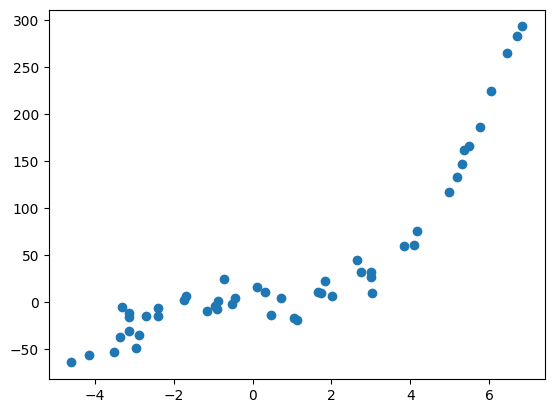

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

rng = np.random.RandomState(2020)
x   =  12*rng.rand(50) - 5
y   =  x**3  + 15*rng.randn(50)
plt.scatter(x, y)

Antes de mais nada, vamos dividir os nossos dados em treino e validação.

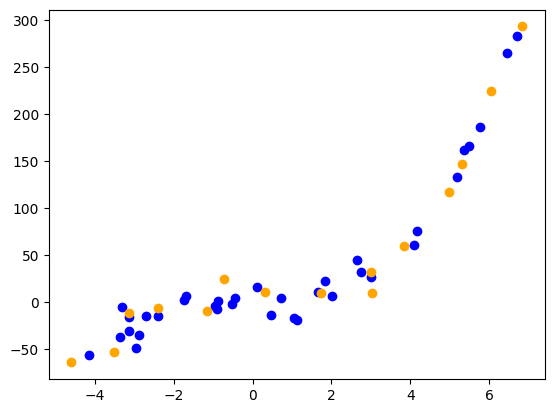

In [ ]:
# Configuração da metodologia de validação
X = x[:, np.newaxis]
X1, X2, y1, y2 = train_test_split(X, y, random_state=2020,
                                  train_size=0.7)
plt.scatter(X1, y1, color = "blue")
plt.scatter(X2, y2, color = "orange")

Vamos agora criar um modelo de regressão linear simples no Scikit e plotar os resultados em um gráfico.

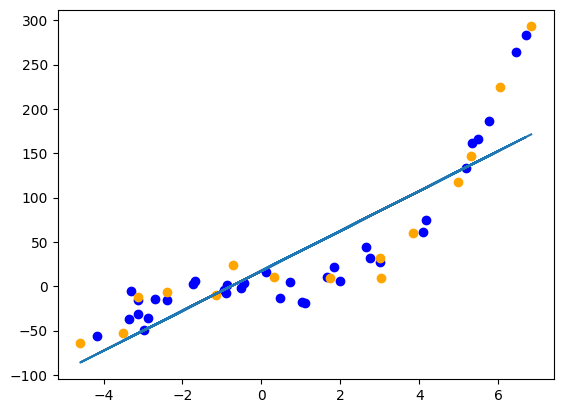

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

## Plotando os resultados
plt.scatter(X1, y1, color = "blue")
plt.scatter(X2, y2, color = "orange")


plt.plot(X, model.predict(X))

Note que o modelo acima erra sistematicamente tanto em instâncias de treino quanto em instâncias de teste.

Vamos agora criar um modelo de regressão polinomial com um polinômio de grau muito alto. Esse modelo é muito mais complexo do que o que seria necessário.

No Scikit-learn, criar um polígono com grau mais alto implica em simplesmente aumentar o número de features para contabilizar pelos novos coeficientes.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly   = PolynomialFeatures(degree=10)
polyX1 = poly.fit_transform(X1)
polyX1.shape

(35, 11)

In [ ]:
import pandas as pd
## Visualizando dados originais como DataFrame
pd.DataFrame(X1[:10],
             columns = ["X"] )

,X
0,2.001540
1,1.116946
2,-2.963571
3,-0.906884
4,6.707986
5,-0.956975
6,1.832957
7,5.755100
8,-3.351719
9,-2.866489


In [ ]:
## Visualizando dados transformados como DataFrame
pd.DataFrame(polyX1[:10],
             columns = ["x^0", "x^1", "x^2", "x^3",
                        "x^4", "x^5", "x^6", "x^7",
                        "x^8", "x^9", "x^10"] )

,x^0,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
0,1.0,2.001540,4.006164,8.018499,16.049349,32.123420,64.296322,128.691684,2.575816e+02,5.155600e+02,1.031914e+03
1,1.0,1.116946,1.247569,1.393468,1.556429,1.738447,1.941752,2.168833,2.422470e+00,2.705769e+00,3.022198e+00
2,1.0,-2.963571,8.782752,-26.028305,77.136724,-228.600139,677.472684,-2007.738222,5.950074e+03,-1.763347e+04,5.225802e+04
3,1.0,-0.906884,0.822438,-0.745856,0.676405,-0.613420,0.556301,-0.504500,4.575232e-01,-4.149204e-01,3.762846e-01
4,1.0,6.707986,44.997073,301.839729,2024.736617,13581.904466,91107.222225,611145.952515,4.099558e+06,2.749978e+07,1.844681e+08
5,1.0,-0.956975,0.915802,-0.876400,0.838693,-0.802608,0.768076,-0.735030,7.034054e-01,-6.731416e-01,6.441799e-01
6,1.0,1.832957,3.359732,6.158245,11.287799,20.690052,37.923979,69.513028,1.274144e+02,2.335451e+02,4.280782e+02
7,1.0,5.755100,33.121177,190.615685,1097.012336,6313.415747,36334.339259,209107.757572,1.203436e+06,6.925895e+06,3.985922e+07
8,1.0,-3.351719,11.234017,-37.653263,126.203137,-422.997392,1417.768187,-4751.959876,1.592723e+04,-5.338360e+04,1.789268e+05
9,1.0,-2.866489,8.216757,-23.553239,67.515090,-193.531233,554.755064,-1590.199043,4.558287e+03,-1.306628e+04,3.745434e+04


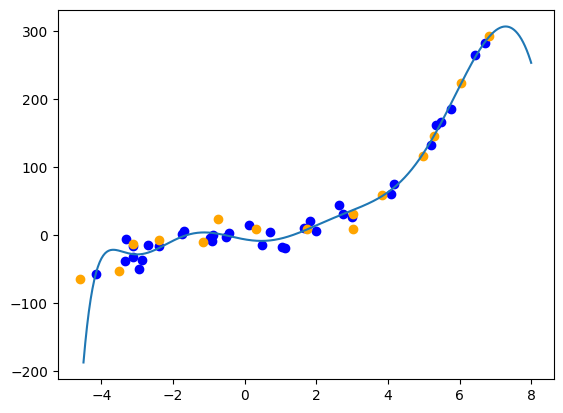

In [ ]:
modelPoly = LinearRegression(fit_intercept=True)
modelPoly.fit(polyX1, y1)

## Plotando os resultados
plt.scatter(X1, y1, color = "blue")
plt.scatter(X2, y2, color = "orange")

X_test = np.linspace(-4.5, 8, 500).reshape(-1,1)
y_test = modelPoly.predict(poly.fit_transform(X_test))
plt.plot(X_test, y_test);

Este modelo é visualmente superior ao anterior. Entretanto, se procurarmos bem, existem pontos em que ele se afasta demais daquilo que tínhamos no banco de dados de teste. Observe, por exemplo, o primeiro ponto do banco de dados de teste veja o que foi predito pelo modelo, o gráfico a seguir ilustra o que está acontecendo.


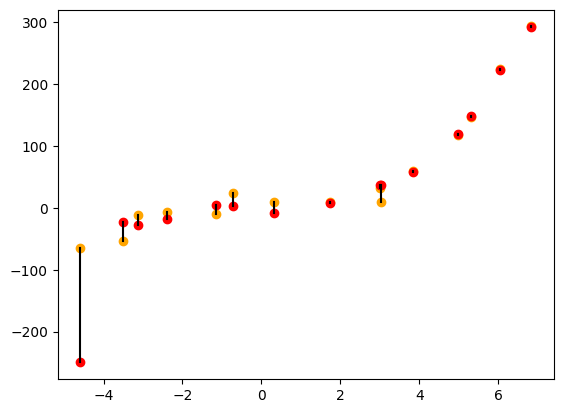

In [ ]:
plt.scatter(X2, y2, color = "orange")

polyX2  = poly.fit_transform(X2)
predY2 = modelPoly.predict(polyX2)
plt.scatter(X2, predY2, color = "red")

for i in range(len(X2)) :
    plt.plot((X2[i], X2[i]), (y2[i], predY2[i]),
             '-', c = "black")


Em outras palavras, nenhum desses modelos é particularmente adequado aos dados, mas eles falham de maneiras diferentes.

O primeiro modelo tenta encontrar um ajuste em linha reta pelos dados. Como os dados são intrinsecamente mais complicados do que uma linha reta, o modelo linear nunca será capaz de descrever bem esse conjunto de dados. Diz-se que esse modelo resultou em **underfitting**, ou seja, ele não possui flexibilidade suficiente para explicar adequadamente todos os recursos dos dados. Outra maneira de dizer isso é que o modelo tem um alto viés.

O segundo modelo tenta ajustar um polinômio de alta ordem através dos dados. Aqui, o ajuste do modelo tem flexibilidade suficiente para explicar quase que perfeitamente os dados de treinamento, mas, embora descreva com precisão os dados de treinamento, sua forma precisa parece refletir mais as propriedades específicas de ruído dos dados do que as  propriedades intrínsecas que geraram esses dados. Diz-se que esse modelo resultou em **overfitting**. Em outras palavras, tem tanta flexibilidade que o modelo acaba contabilizando ruídos aleatórios, bem como a distribuição de dados subjacente. Outra maneira de dizer isso é que o modelo tem alta variância.

Se imaginarmos que temos alguma capacidade de ajustar a complexidade do modelo, esperamos que o erro associado ao treinamento e a validação se comportem conforme ilustrado na figura a seguir:

![alt text](http://www.ic.unicamp.br/~udias/si202/bias_variance6.png)

Esse diagrama é freqüentemente chamado de curva de validação e vemos os seguintes recursos essenciais:

1.   O erro do treinamento é geralmente menor que o erro da validação. O modelo se ajustará melhor aos dados que ele viu do que aos dados que não viu.

2.   Para uma complexidade muito baixa do modelo (um modelo com alto viés), os dados de treinamento não são adequados, o que significa que o modelo é um mau preditor para os dados de treinamento e para quaisquer dados não vistos anteriormente.

3.   Para uma complexidade de modelo muito alta (um modelo de alta variação), os dados de treinamento resultam em **overfitting**, o que significa que o modelo prevê muito bem os dados de treinamento, mas falha com os dados não vistos anteriormente.

4.    Para algum valor intermediário, a curva de validação tem um mínimo. Esse nível de complexidade indica um compromisso adequado entre viés e variância.

Os meios de ajustar a complexidade variam de modelo para modelo, mas cada modelo permite esse ajuste. Na regressão, o grau do polinômio é o parâmetro que geralmente precisa ser configurado para se escolher o melhor modelo. Por exemplo, vamos analisar vários modelos. Primeiramente, vamos plotar um gráfico com a nossa expectativa em cada um deles.

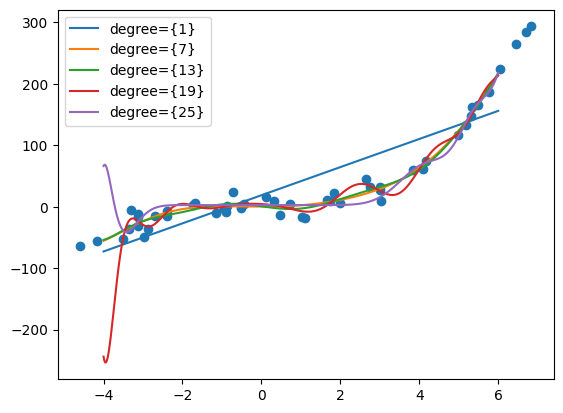

In [ ]:
## Não precisa entender o código a seguir, apenas o gráfico
## que ele gera.

plt.scatter(X, y)

X_test = np.linspace(-4.0, 6, 500)[:, None]


for degree in range(1, 30, 6) :
  poly   = PolynomialFeatures(degree=degree)
  poly_X = poly.fit_transform(X)

  modelPoly = LinearRegression(fit_intercept=True)
  modelPoly.fit(poly_X, y)

  poly_X_test = poly.fit_transform(X_test)
  outcome = modelPoly.predict(poly_X_test)

  ## Plotando os resultados

  plt.plot(X_test, outcome, label='degree={%i}'%degree)
plt.legend(loc='best')

Qual grau de polinômio fornece um custo-benefício adequado entre viés e variância?

Podemos visualizar a curva de validação para esses dados e modelos específicos. Isso pode ser feito diretamente, usando a rotina de  **validation_curve** fornecida pelo Scikit-Learn. Dados um modelo, nome de um parâmetro e um intervalo a explorar, essa função calculará automaticamente a pontuação do treinamento e a validação no intervalo. O gráfico resultante mostra a variação de um score.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


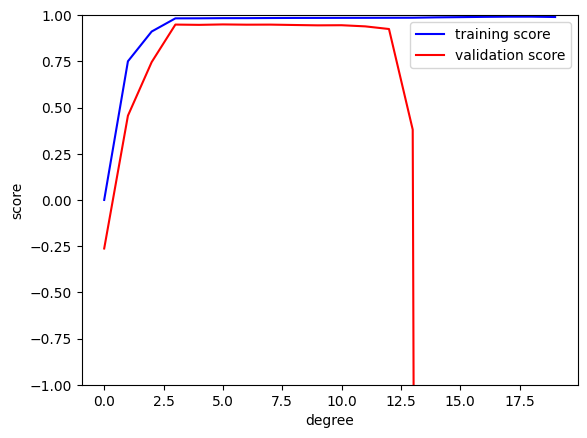

In [ ]:
# Vamos criar um modelo para regressão polinomial.
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

#
from sklearn.model_selection import validation_curve
degree = np.arange(0, 20)
print(degree)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name = 'polynomialfeatures__degree',
                                          param_range = degree, cv=5)

plt.plot(degree, np.mean(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-1, 1)
plt.xlabel('degree')
plt.ylabel('score');

O gráfico mostra precisamente o comportamento qualitativo que esperamos:

1.   A pontuação do treinamento é geralmente superior à pontuação da validação;
2.   A pontuação do treinamento está melhorando monotonicamente com o aumento da complexidade do modelo;
3.   A pontuação de validação atinge o máximo antes de cair, à medida que o modelo se ajusta demais (**overfitting**).

A partir da curva de validação, podemos ler que o custo-benefício ideal entre viés e variância é encontrado para um polinômio de terceira ordem.

# Grid-Search

A discussão anterior fornece uma intuição sobre o custo-benefício entre viés e variância, além da dependência em relação à complexidade do modelo. Na prática, os modelos geralmente têm mais de um parâmetro para configurar. Portanto, várias curvas de validação geram superfícies multidimensionais. Nesses casos, a interpretação dessas visualizações exige experiência.

Grid-search é uma técnica amplamente utilizada em aprendizado de máquina para encontrar a melhor combinação de hiperparâmetros para um modelo.

Hiperparâmetros são valores que definem o comportamento de um modelo de aprendizado de máquina, como o número de camadas em uma rede neural ou a taxa de aprendizado usada em um algoritmo de otimização. A escolha adequada dos hiperparâmetros é crucial para obter um modelo preciso e bem ajustado.

O grid-search envolve a definição de uma grade (ou "grid") de valores possíveis para cada hiperparâmetro que se deseja ajustar. Em seguida, o modelo é treinado e avaliado para cada combinação possível de valores de hiperparâmetros na grade. Isso permite que sejam testadas várias combinações de hiperparâmetros para determinar qual combinação produz o melhor desempenho do modelo.

Embora o grid-search seja uma técnica simples e fácil de implementar, ela pode ser intensiva em termos computacionais, especialmente para modelos mais complexos ou grandes grades de hiperparâmetros. Outras técnicas, como a busca aleatória, a busca em grades adaptativas e a busca bayesiana, podem ser usadas para reduzir o tempo de execução e melhorar a eficiência da busca de hiperparâmetros.

O Scikit-Learn fornece ferramentas automatizadas para escolher um conjunto de bons parâmetros usando Grid-Search. Vamos explorar uma busca em grid tridimensional de recursos de um modelo.  Isso pode ser feito usando o algoritmo GridSearchCV do Scikit-Learn:

In [ ]:
from sklearn.model_selection import GridSearchCV

## Conjunto de parâmetros que queremos otimizar
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X, y);

Agora que o modelo foi treinado, podemos ver os melhores parâmetros escolhidos pelo GridSearchCV.

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 5}

Vamos usar o melhor modelo obtido e plotar um resultado.

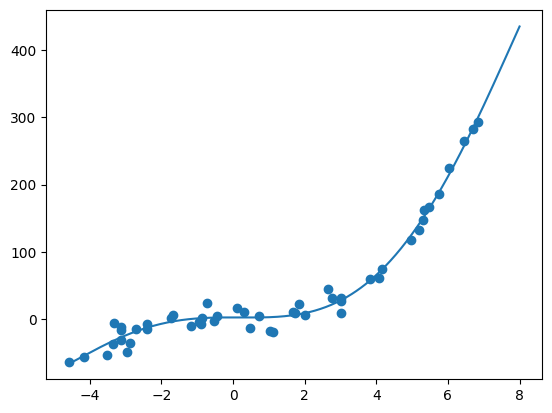

In [ ]:
model = grid.best_estimator_

plt.scatter(X, y)

X_test = np.linspace(-4.5, 8, 500)[:, None]
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test, y_test);

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
rand = RandomizedSearchCV(PolynomialRegression(),
                          param_grid, cv=7,
                          n_iter = 10)
rand.fit(X, y);

In [ ]:
rand.best_params_

{'polynomialfeatures__degree': 4, 'linearregression__fit_intercept': False}

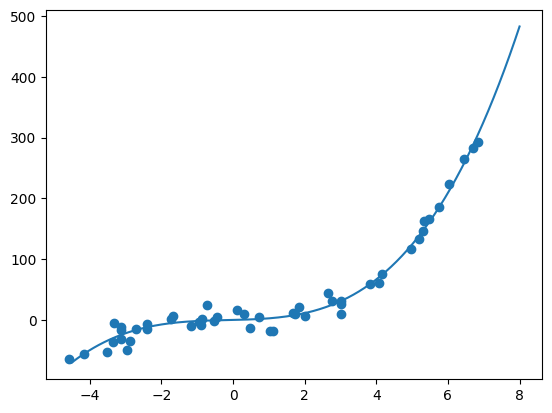

In [ ]:
model = rand.best_estimator_

plt.scatter(X, y)

X_test = np.linspace(-4.5, 8, 500)[:, None]
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test, y_test);